# Graded Challenge 3 - Phase 1
Muhammad Ikhsan Rahman Hakim - FTDS001




## About this dataset

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide. Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.


**We want to create a model for predicting mortality caused by Heart Failure.**

# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import time
import xgboost as xgb
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import f1_score, roc_curve, classification_report, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

%matplotlib inline

# Data Loading

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
# we can see all the columns
pd.set_option('display.max_columns', 100)

# Dataset Exploration

In [4]:
df.shape

(299, 13)

In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**Column description :**


1. **age** = Age
2. **anaemia** = Decrease of red blood cells or hemoglobin (boolean)
3. **creatinine_phosphokinase** = Level of the CPK enzyme in the blood (mcg/L)
4. **diabetes** = If the patient has diabetes (boolean)
5. **ejection_fraction** = Percentage of blood leaving the heart at each contraction (percentage)
6. **high_blood_pressure** = If the patient has hypertension (boolean)
7. **platelets** = Platelets in the blood (kiloplatelets/mL)
8. **serum_creatinine** = Level of serum creatinine in the blood (mg/dL)
9. **serum_sodium** = Level of serum sodium in the blood (mEq/L)
10. **sex** = Woman or man (binary)
11. **smoking** = If the patient smokes or not (boolean)
12. **time** = Follow-up period (days)
13. **DEATH_EVENT** = If the patient deceased during the follow-up period (boolean)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


# Data Cleaning

In [8]:
# dataset dimension
print('Dataset dimension: ',df.shape)
print('Total rows :',df.shape[0])
print('Total columns :', df.shape[1])

Dataset dimension:  (299, 13)
Total rows : 299
Total columns : 13


### Missing Values

In [9]:
df.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

It seems like this dataset already cleaned before because there's no null value detected by pandas.

In [10]:
#checking null value again. For sure.
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [11]:
#checking unique data from every columns. Just in case there's an unknown input
check = df.columns
for column in check:
    print([column],'\n', df[column].unique(),'\n')

['age'] 
 [75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ] 

['anaemia'] 
 [0 1] 

['creatinine_phosphokinase'] 
 [ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  200  248
  270 1808 1082  719  193 4540  646  281 1548  805  291  482  943  185
  132 1610 2261  233   30 1846  335   58  91

### Duplicate Rows

In [12]:
#check duplicate data
df.duplicated().any()

False

### Change Data Type

In [13]:
#change datatype 'age' to int64
df['age'] = df['age'].astype('int64')

# Data Exploration (EDA)

In [14]:
# set plot style for EDA
plt.style.use('fivethirtyeight')

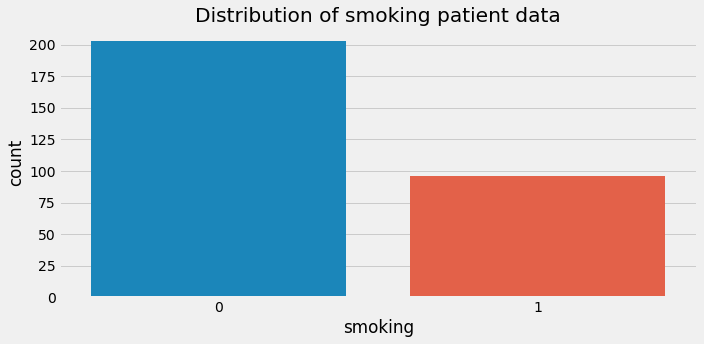

In [15]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['smoking'])
plt.title("Distribution of smoking patient data")
plt.tight_layout()
plt.show()

From the dataset, we have more patients who don't smoke.

### Univariate

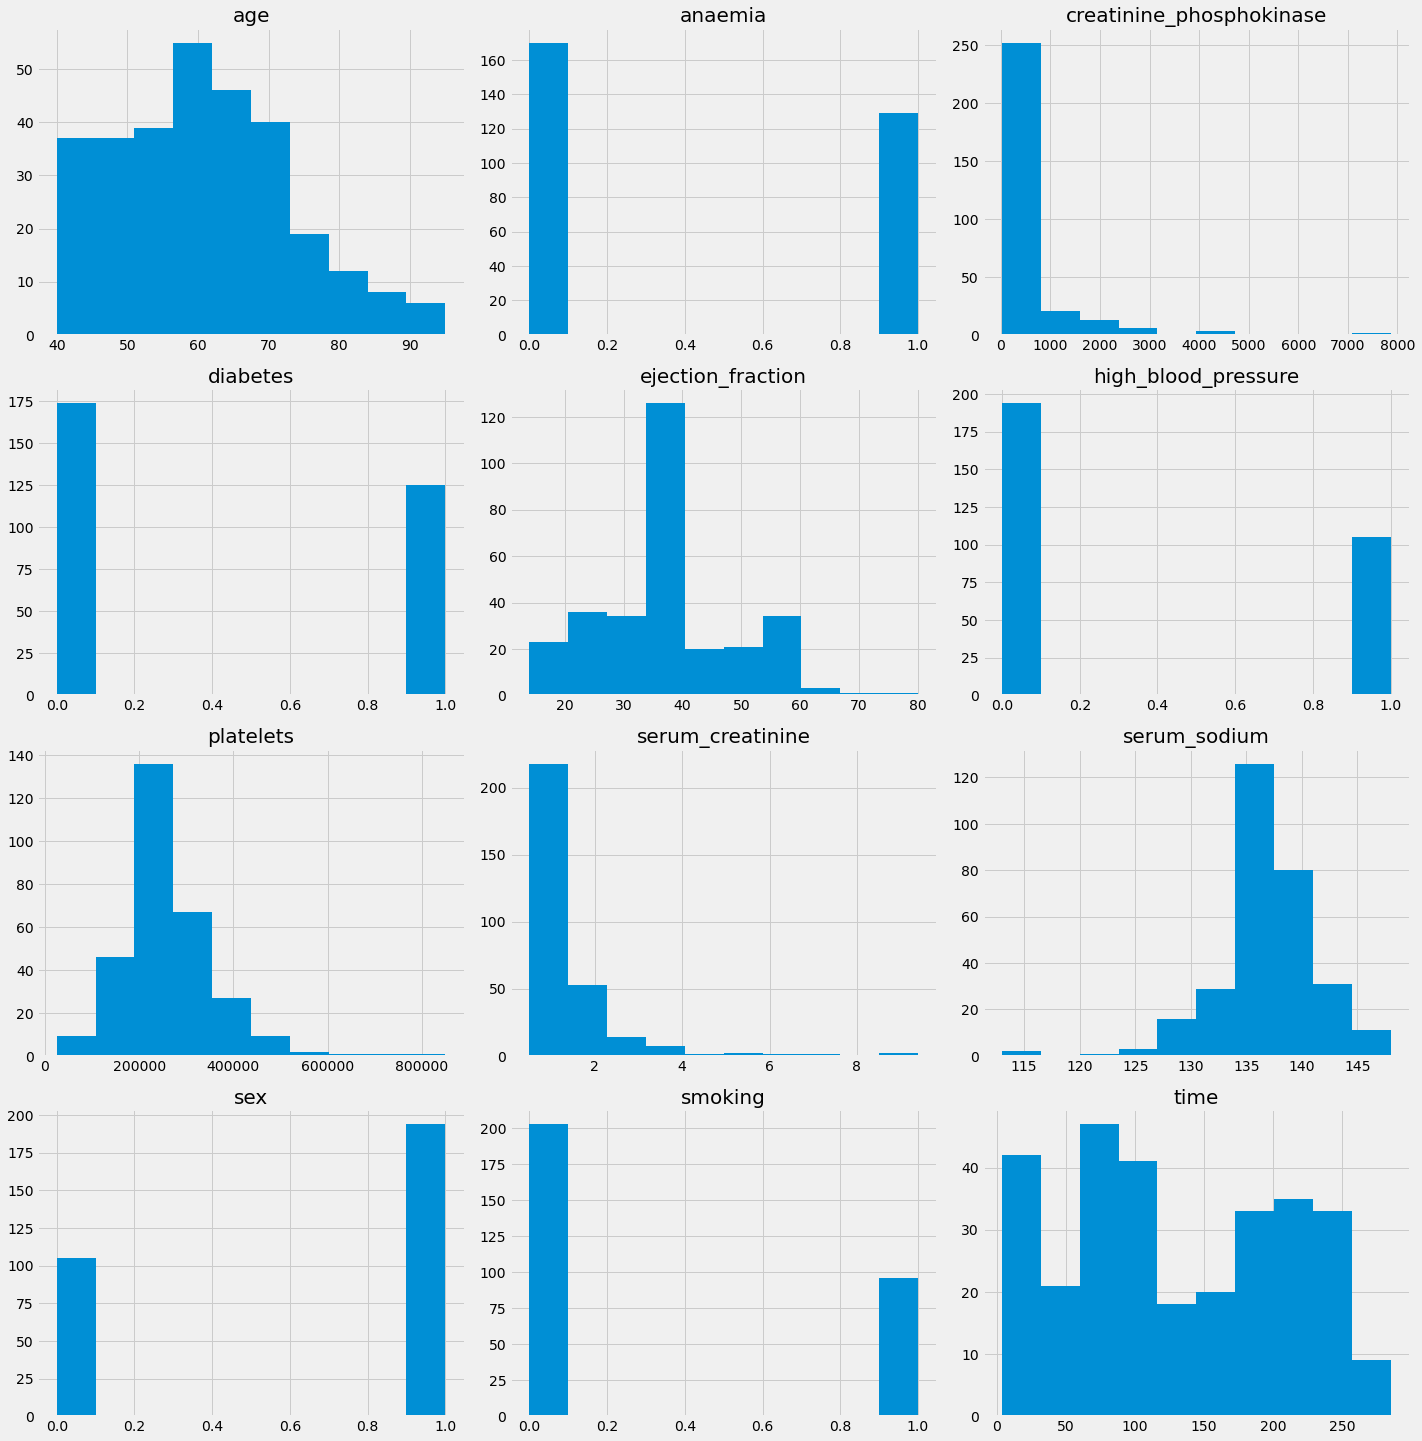

In [16]:
# dropping target columns
cols = list(df.drop(columns = ['DEATH_EVENT']).columns)

plt.figure(figsize = (20, 25))
for i in range(len(cols)):
    plt.subplot(len(cols)//3+1, 3, i + 1)
    plt.hist(df[cols[i]])
    plt.title(cols[i], fontsize = 20)
    
plt.tight_layout()
plt.show()

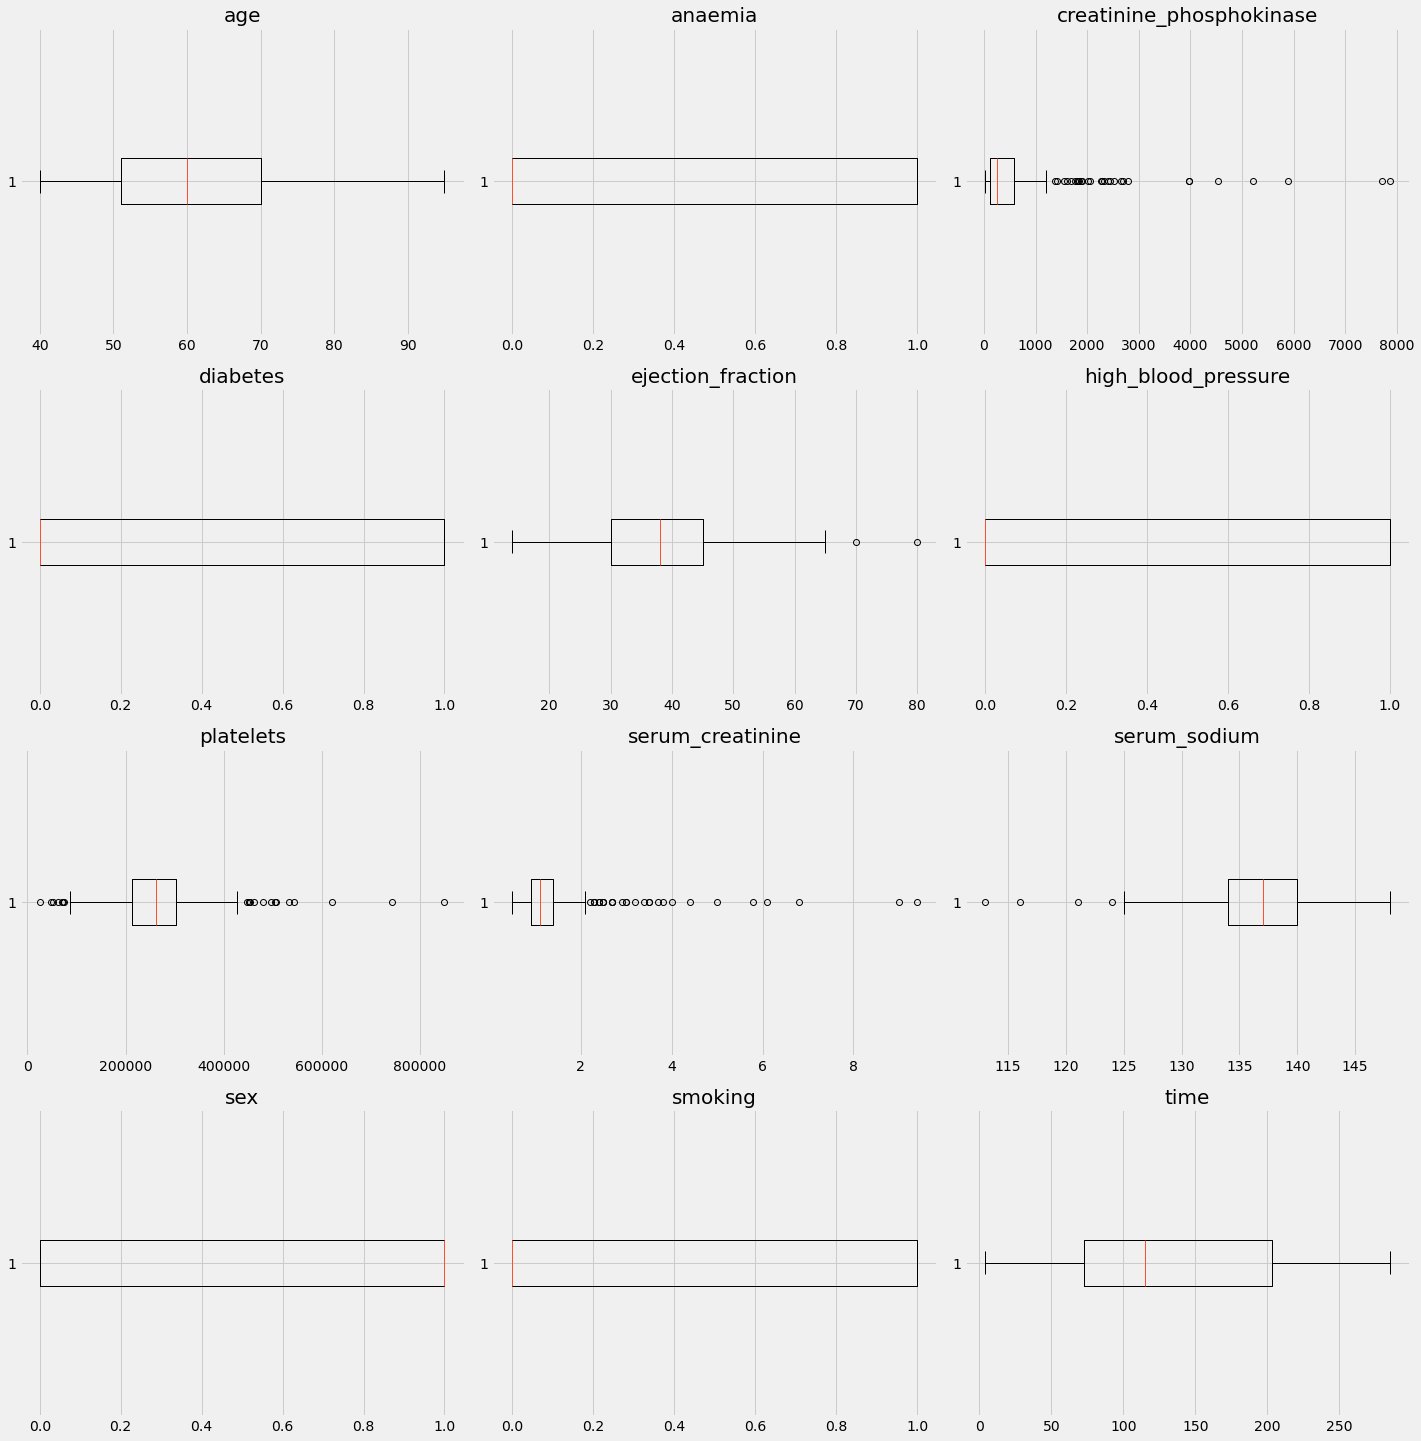

In [17]:
plt.figure(figsize = (20, 25))
for i in range(len(cols)):
    plt.subplot(len(cols)//3+1, 3, i + 1)
    plt.boxplot(df[cols[i]], vert=False)
    plt.title(cols[i], fontsize = 20)
    
plt.tight_layout()
plt.show()

From the visualizations above. We can see that we have some data skewed.

### Multivariate

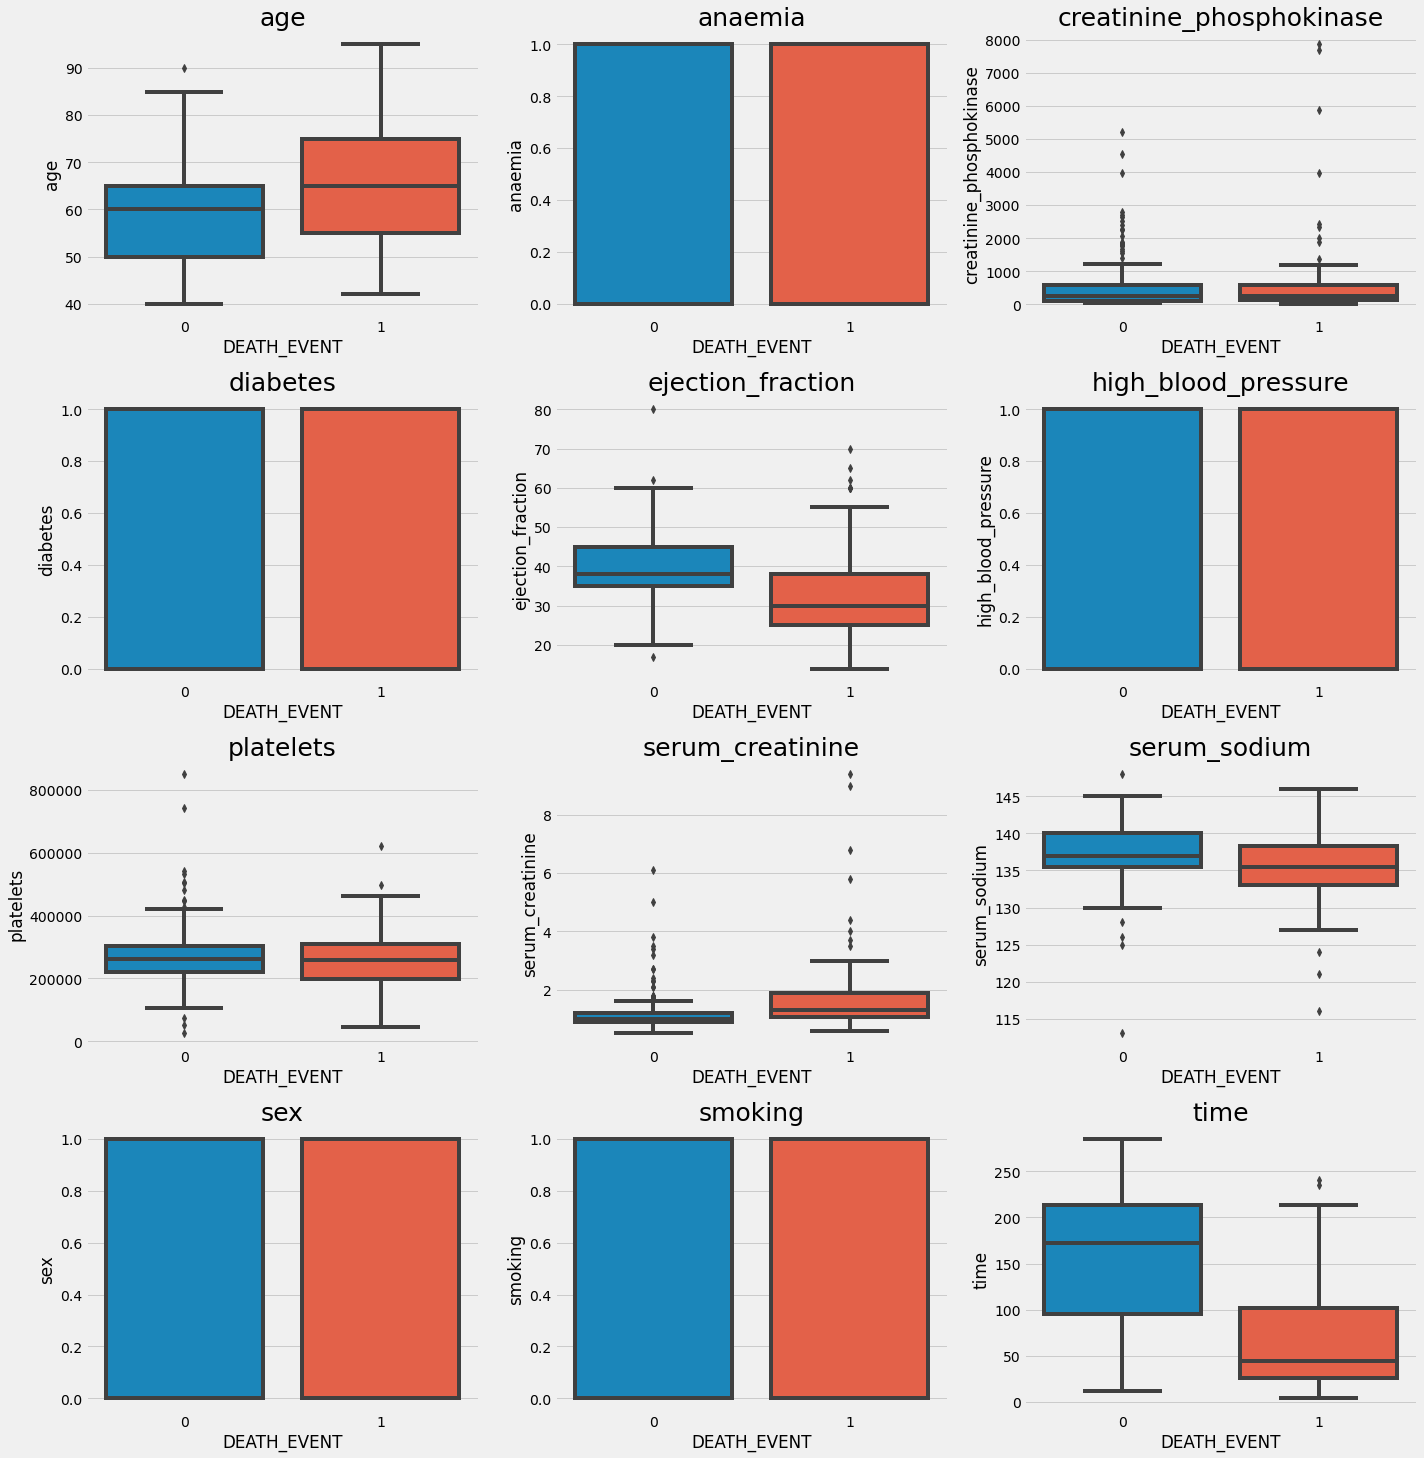

In [18]:
plt.figure(figsize = (20, 25))
for i in range(len(cols)):
    plt.subplot(len(cols)//3+1, 3, i + 1)
    sns.boxplot(y = df[cols[i]], x = df['DEATH_EVENT'])
    plt.title(cols[i], fontsize = 25)
    
plt.tight_layout()
plt.show()

Most of the distribution of each columns (features) to target is similar.

### Target Variables

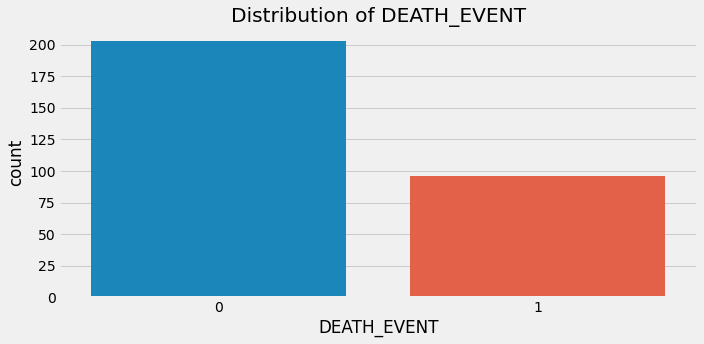

In [19]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['DEATH_EVENT'])
plt.title("Distribution of DEATH_EVENT")
plt.tight_layout()
plt.show()

We expect 0 as 'No'. So, from the dataset we have low death rate.

## Correlation Matrix

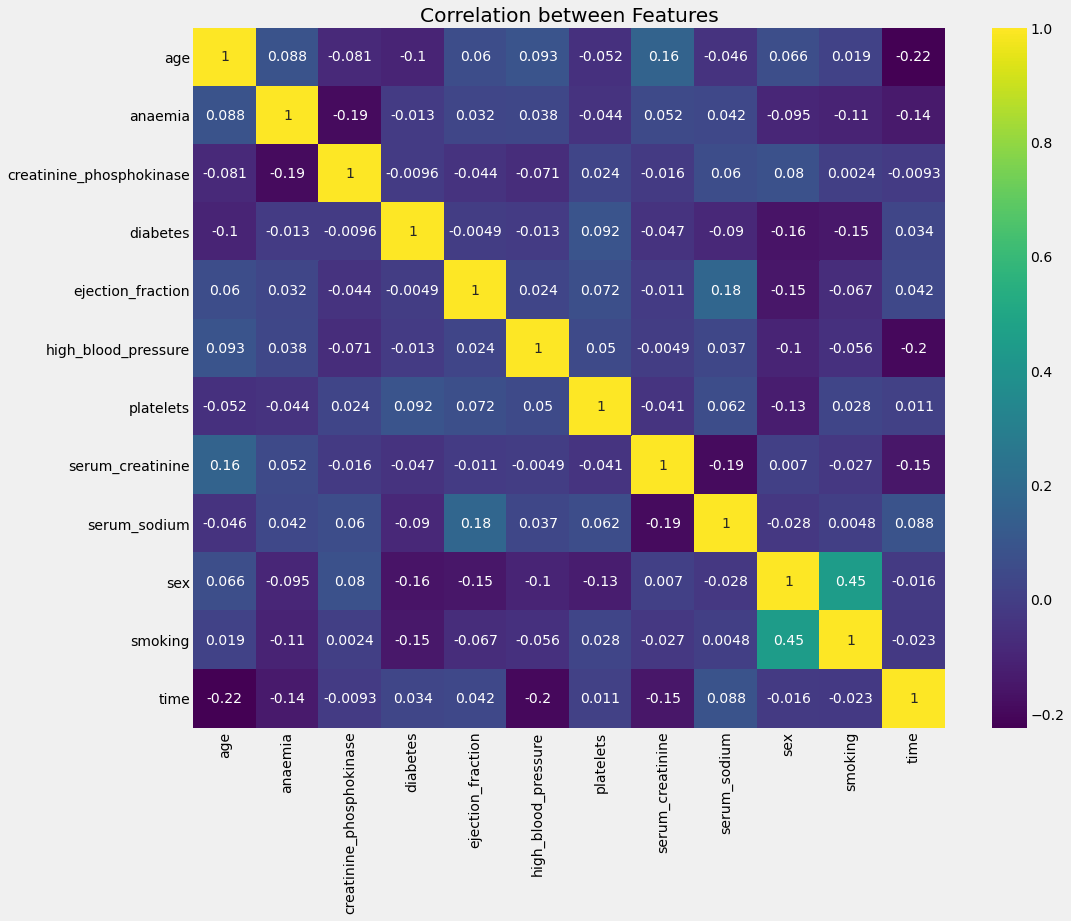

In [20]:
corr = df[cols].corr(method = 'pearson')

plt.figure(figsize = (15, 12))
sns.heatmap(corr, cmap='viridis', annot=True)
            
plt.title("Correlation between Features")
plt.show()

Features correlation between each other max only 0,45. So, we can assume that these features are independent.

# Data Preprocessing

## Features selection

We will use all columns as Features except DEATH_EVENT, because it's our Target.

In [22]:
X = df.drop(columns = ["DEATH_EVENT"])
y = df["DEATH_EVENT"]

## Split Dataset

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [26]:
X_train.shape, y_train.shape

((209, 12), (209,))

In [28]:
X_test.shape, y_test.shape

((90, 12), (90,))

## Scaling

In [29]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [30]:
X_train_trf = scaler.transform(X_train)
X_test_trf = scaler.transform(X_test)

# Define Model

## Random Forest

### Model Training

Train the model and calculate the time.

In [31]:
model_rf = RandomForestClassifier(n_estimators=100)
%time model_rf.fit(X_train_trf, y_train)

Wall time: 127 ms


RandomForestClassifier()

### Model Evaluation
#### Compare the train-set and test-set accuracy

*Train-Set*

In [32]:
model_rf_pred = model_rf.predict(X_train_trf)
%time print('Train-set Model accuracy score: ', accuracy_score(y_train, model_rf_pred))

Train-set Model accuracy score:  1.0
Wall time: 0 ns


*Test-set*

In [33]:
model_rf_pred_test = model_rf.predict(X_test_trf)
%time print('Test-set Model accuracy score: ', accuracy_score(y_test, model_rf_pred_test))

Test-set Model accuracy score:  0.7777777777777778
Wall time: 0 ns


#### Classification_report

*Train-set*

In [34]:
%time print(classification_report(y_train, model_rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00        59

    accuracy                           1.00       209
   macro avg       1.00      1.00      1.00       209
weighted avg       1.00      1.00      1.00       209

Wall time: 5 ms


*Test-set*

In [35]:
%time print(classification_report(y_test, model_rf_pred_test))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        53
           1       0.87      0.54      0.67        37

    accuracy                           0.78        90
   macro avg       0.81      0.74      0.75        90
weighted avg       0.80      0.78      0.76        90

Wall time: 7 ms


#### Confusion Matrix (Test-set)

In [36]:
%time print(confusion_matrix(y_test, model_rf_pred_test))

[[50  3]
 [17 20]]
Wall time: 999 µs


#### ROC AUC Score

*Train-set*

In [37]:
%time print(roc_auc_score(y_train, model_rf_pred))

1.0
Wall time: 8 ms


*Test-set*

In [38]:
%time print(roc_auc_score(y_test, model_rf_pred_test))

0.7419683834778175
Wall time: 999 µs


### Cross Validation RandomForest

In [39]:
%time accuracy_cv_rf = cross_val_score(model_rf, X, y, cv=10)
print(accuracy_cv_rf)

#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:", accuracy_cv_rf.mean() * 100)

Wall time: 1.3 s
[0.33333333 0.86666667 0.93333333 0.93333333 0.86666667 0.86666667
 0.7        0.73333333 0.73333333 0.68965517]
Accuracy of Model with Cross Validation is: 76.5632183908046


In [40]:
%time accuracy_cv_rf = cross_val_score(model_rf, X_train_trf, y_train, cv=10)
print(accuracy_cv_rf)

#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:", accuracy_cv_rf.mean() * 100)

Wall time: 1.19 s
[0.85714286 0.66666667 0.9047619  0.95238095 0.95238095 0.9047619
 0.80952381 0.76190476 0.95238095 0.9       ]
Accuracy of Model with Cross Validation is: 86.61904761904763


Cross validation is a procedure used to avoid overfitting and estimate the skill of the model on new data.

For Random Forest, we got 77.89 Accuracy.

### Model Inference

Using the existed model to predict new data.

In [41]:
prediction_results = []

tstart = time.time()
#predict x test
model_pred = model_rf.predict(X_test_trf)

# append result to list
prediction_results.append(model_pred)

tfinish = time.time()
time_elapsed = round((tfinish - tstart)*1000, 2)

print('Elapsed prediction time: ',time_elapsed,' ms')

Elapsed prediction time:  12.0  ms


In [42]:
# predict result to dataframe
prediction_result_rf = pd.DataFrame({
    "Actual DEATH_EVENT":y_test,
    "Prediction":prediction_results[0]
})
prediction_result_rf.head()

,Actual DEATH_EVENT,Prediction
281,0,0
265,0,0
164,1,0
9,1,1
77,0,0


### Random Forest Hyperparameter Tuning

- Randomized Search Cross Validation

In [43]:
# Print score function

def print_score(model, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = model.predict(X_train)
        model_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{model_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = model.predict(X_test)
        model_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{model_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [44]:
tstart = time.time() #for calculating processing time

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

model_rf = RandomForestClassifier(random_state=42)

model_rf_rsCV = RandomizedSearchCV(estimator=model_rf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

model_rf_rsCV.fit(X_train_trf, y_train)
rf_best_params = model_rf_rsCV.best_params_
print(f"Best parameters: {rf_best_params})")
tfinish = time.time()

time_elapsed = round((tfinish - tstart)*1000, 2)
print('Elapsed prediction time: ',time_elapsed,' ms')

model_rf = RandomForestClassifier(**rf_best_params)
model_rf.fit(X_train_trf, y_train)

print_score(model_rf, X_train_trf, y_train, X_test_trf, y_test, train=True)
print_score(model_rf, X_train_trf, y_train, X_test_trf, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True})
Elapsed prediction time:  98189.99  ms
Train Result:
Accuracy Score: 94.26%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.948052   0.927273  0.942584    0.937662      0.942186
recall       0.973333   0.864407  0.942584    0.918870      0.942584
f1-score     0.960526   0.894737  0.942584    0.927632      0.941954
support    150.000000  59.000000  0.942584  209.000000    209.000000
_______________________________________________
Confusion Matrix: 
 [[146   4]
 [  8  51]]

Test Result:
Accuracy Score: 76.67%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.750000   0.807692

Best parameters based on Randomized Search Cross Validation are:

- n_estimators : 800
- min_samples_split : 10
- min_samples_leaf : 4
- max_features : sqrt
- max_depth : 50
- bootstrap : True

And with best parameter from Randomized Search CV, it got:
1. Train Accuracy Score: 94.26%
2. Test Accuracy Score: 76.67%

- GridSearchCV

In [45]:
tstart = time.time() #for calculating processing time

n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

model_rf = RandomForestClassifier(random_state=42)

model_rf_gridCV = GridSearchCV(model_rf, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)


model_rf_gridCV.fit(X_train_trf, y_train)
best_params = model_rf_gridCV.best_params_
print(f"Best parameters: {best_params}")
tfinish = time.time()

time_elapsed = round((tfinish - tstart)*1000, 2)
print('Elapsed prediction time: ',time_elapsed,' ms')

model_rf = RandomForestClassifier(**best_params)
model_rf.fit(X_train_trf, y_train)

print_score(model_rf, X_train_trf, y_train, X_test_trf, y_test, train=True)
print_score(model_rf, X_train_trf, y_train, X_test_trf, y_test, train=False)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits
Best parameters: {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 1000}
Elapsed prediction time:  510972.51  ms
Train Result:
Accuracy Score: 93.78%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.941935   0.925926  0.937799    0.933931      0.937416
recall       0.973333   0.847458  0.937799    0.910395      0.937799
f1-score     0.957377   0.884956  0.937799    0.921166      0.936933
support    150.000000  59.000000  0.937799  209.000000    209.000000
_______________________________________________
Confusion Matrix: 
 [[146   4]
 [  9  50]]

Test Result:
Accuracy Score: 75.56%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.738462   0.800000

Best parameters based on Grid Search Cross Validation are:

- n_estimators : 1000
- min_samples_split : 2
- min_samples_leaf : 4
- max_features : auto
- max_depth : 5
- bootstrap : True

And with best parameter from Grid Search CV, it got:
1. Train Accuracy Score: 93.78%
2. Test Accuracy Score: 76.67%

*Conclusion from Random Forest Hyperparameter Tuning*

From our original parameter and "Best Parameter" from RandomizedSearchCV and GridSearchCV, we get two same accuracy score with our initial accuracy score.

## Gradient Boosting

### Model Training
Train the model with Gradient Boosting and calculate the time

In [46]:
model_grad_boost = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
%time model_grad_boost.fit(X_train_trf, y_train)

Wall time: 119 ms


GradientBoostingClassifier(n_estimators=200, random_state=42)

### Model Evaluation

In [47]:
# Evaluate function

def evaluate(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print("TRAINIG RESULTS: \n===============================")
    model_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"ROC_AUC SCORE:\n{roc_auc_score(y_train, y_train_pred)}\n")
    print(f"CLASSIFICATION REPORT:\n{model_report}\n")

    print("TESTING RESULTS: \n===============================")
    model_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"ROC_AUC SCORE:\n{roc_auc_score(y_test, y_test_pred)}\n")
    print(f"CLASSIFICATION REPORT:\n{model_report}")

In [48]:
%time evaluate(model_grad_boost, X_train_trf, y_train, X_test_trf, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[150   0]
 [  0  59]]
ACCURACY SCORE:
1.0000
ROC_AUC SCORE:
1.0

CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    150.0  59.0       1.0      209.0         209.0

TESTING RESULTS: 
CONFUSION MATRIX:
[[44  9]
 [18 19]]
ACCURACY SCORE:
0.7000
ROC_AUC SCORE:
0.6718510963793983

CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.709677   0.678571       0.7   0.694124      0.696889
recall      0.830189   0.513514       0.7   0.671851      0.700000
f1-score    0.765217   0.584615       0.7   0.674916      0.690970
support    53.000000  37.000000       0.7  90.000000     90.000000
Wall time: 21 ms


### Cross Validation Gradient Boosting

In [49]:
%time accuracy_cv_gb = cross_val_score(model_grad_boost, X, y, cv=10)
print(accuracy_cv_gb)

#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:", accuracy_cv_gb.mean() * 100)

Wall time: 1.37 s
[0.33333333 0.8        0.83333333 0.73333333 0.73333333 0.8
 0.56666667 0.7        0.73333333 0.68965517]
Accuracy of Model with Cross Validation is: 69.22988505747126


In [50]:
%time accuracy_cv_gb = cross_val_score(model_grad_boost, X_train_trf, y_train, cv=10)
print(accuracy_cv_gb)

#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:", accuracy_cv_gb.mean() * 100)

Wall time: 1.2 s
[0.9047619  0.66666667 0.9047619  0.95238095 0.9047619  0.85714286
 0.80952381 0.76190476 0.9047619  0.85      ]
Accuracy of Model with Cross Validation is: 85.16666666666669


### Model Inference

Using the existed model to predict new data.

In [51]:
prediction_result = []

tstart = time.time()
model_pred = model_grad_boost.predict(X_test_trf)

prediction_result.append(model_pred)
tfinish = time.time()
time_elapsed = round((tfinish - tstart)*1000,2)

print('Elapsed prediction time: ', time_elapsed, 'ms')

Elapsed prediction time:  1.0 ms


In [52]:
#insert predict result to dataframe
prediction_result_gb = pd.DataFrame({
    "Actual Death_event":y_test,
    "Prediction with GB":prediction_result[0]
})
prediction_result_gb.head()

,Actual Death_event,Prediction with GB
281,0,1
265,0,0
164,1,0
9,1,1
77,0,0


### Gradient Boosting Hyperparameter Tuning
Randomized Search CV

In [53]:
tstart = time.time() #for calculating processing time

loss = ['deviance','exponential']
learning_rate = [0.1, 0.4, 0.7]
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(3, 30, num=10)]
#max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]


random_grid = {'loss': loss, 'learning_rate': learning_rate,
               'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

model_gb = GradientBoostingClassifier(random_state=42)

model_gb_rsCV = RandomizedSearchCV(estimator=model_gb, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

model_gb_rsCV.fit(X_train_trf, y_train)
best_params = model_gb_rsCV.best_params_
print(f"Best parameters: {best_params}")
tfinish = time.time()

time_elapsed = round((tfinish - tstart)*1000, 2)
print('Elapsed prediction time: ',time_elapsed,' ms')

model_gb = GradientBoostingClassifier(**best_params)
model_gb.fit(X_train_trf, y_train)

%time evaluate(model_gb, X_train_trf, y_train, X_test_trf, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 21, 'loss': 'exponential', 'learning_rate': 0.7}
Elapsed prediction time:  100175.09  ms
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[150   0]
 [  0  59]]
ACCURACY SCORE:
1.0000
ROC_AUC SCORE:
1.0

CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    150.0  59.0       1.0      209.0         209.0

TESTING RESULTS: 
CONFUSION MATRIX:
[[49  4]
 [16 21]]
ACCURACY SCORE:
0.7778
ROC_AUC SCORE:
0.74604793472718

CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.753846   0.840000  0.777778   0.796923      0.789265
recall      0.924528   0.567568  0.77777

# Conclusion

## Overal Analysis EDA

- From the dataset, we have more patients who don't smoke.
- From the dataset, we have low death rate.
- Most of the data distribution of each columns (features) to target is similar.
- Most of the data distribution are normally distributed but We can see that we have some data skewed.

## Model Analysis

- **Random Forest** (time: 253 ms)
 - Accuracy = 0.766
 - ROC_AUC Score = 0.736
 - f1 score = 0.67
 - Confussion Matrix = [[48  5],[16 21]]
   - TN = 48 , FP = 5 , FN = 16 , TP = 21
 - Accuracy of Model with Cross Validation is = 77.89
 - Randomized Search CV Best parameters = 'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True
   - Randomized Search CV Accuracy Score = 76.67%
   - f1 score = 0.65
   - CM [[49  4],[17 20]]
     - TN = 49 , FP = 4 , FN = 17 , TP = 20
   - Elapsed prediction time = 133817.61 ms or around 2 minutes
 - Grid Search CV Best parameters: 'bootstrap' = True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 1000
   - Grid Search CV Accuracy Score = 77.78%
   - f1 score = 0.65
   - CM [[49  4],[17 20]]
     - TN = 49 , FP = 4 , FN = 17 , TP = 20
   - Elapsed prediction time = 739625.24 ms or around 12 minutes


- **Gradient Boosting** (time: 143 ms)
 - Accuracy = 0.70
 - ROC_AUC Score = 0.671
 - f1 score = 0.58
 - Confussion Matrix = [[44  9],[18 19]]
   - TN = 44 , FP = 9 , FN = 18 , TP = 19
 - Accuracy of Model with Cross Validation (with X and y)is = 69.229
 - Randomized Search CV Best parameters: 'n_estimators': 800, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 21, 'loss': 'exponential', 'learning_rate': 0.7
   - Randomized Search CV Accuracy Score = 0,7667
   - Confusion Matrix [[49  4],[17 20]]
     - TN = 49 , FP = 4 , FN = 17 , TP = 20
   - ROC_AUC SCORE = 0.732
   - f1 score = 0.65
   - Elapsed prediction time = 158586.28 ms or around 2.5 minutes


---

From these two models, the accuracy is not much different, even after optimizing the parameters using "Randomized Search Cross Validation " and "GridSearchCV". From the results of "Confusion Matrix", both of them get a high "False Negative" (which makes the recall value low). And also. the "F1 score" obtained by both of them is not too good even after the parameters have been optimized.

Because the dataset used is medically related, I will choose a model that produces a high recall value (low "False Negative") to predict the patient's likelihood of heart failure. Because it's better to predict a patient will have heart failure when he doesn't, than the other way around. So that patients can be monitored and treated intensively.


Therefore, I conclude that Random Forest is suitable for use in this dataset. But we should look into other model, maybe can get better results (Accuracy > 0.80).